In [8]:
from numpy.linalg import norm
from numpy import cross, eye
from scipy.linalg import expm
import numpy as np
import pymatgen as p
import matplotlib.pyplot as plt
pi=np.pi
%matplotlib widget

In [281]:
def transform(structure_given,angle=-180,phi=0,atom=1,inplace=False):
        structure=structure_given.copy()
        coor=[]
        if atom==1:
            pos=structure.get_neighbor_list(2.8,[structure[0]])[1]
            if 0 not in pos:
                pos=np.hstack((pos,0))
        else:
            pos=structure.get_neighbor_list(2.4,[structure[1]])[1]
            if 1 not in pos:
                pos=np.hstack((pos,1))
        #coord = (structure[3].coords+structure[5].coords+structure[6].coords+structure[8].coords)/4
        coord=np.array([structure[i].coords for i in pos]).mean(axis=0)
        structure.rotate_sites(pos,np.deg2rad(angle),[0,1,0],coord,to_unit_cell=True)
        structure.rotate_sites(pos,np.deg2rad(phi),[1,0,0],coord,to_unit_cell=True)
        structure.to("cif","structures/dipole_2.cif")
        return structure
#!open structures/dipole_2.cif

In [203]:
structure = p.Structure.from_file("structures/final_dipoles.cif")
s=transform(structure,angle=180,atom=1)
!#open structures/dipole_2.cif

In [237]:
structure = p.Structure.from_file("structures/final_dipoles.cif")
s=transform(structure,angle=0,phi=0,atom=2)
nn=s.get_neighbor_list(4.5,[s[1],s[0]])
#nn[-1][nn[1] not in [0,1]]
print(nn[1][np.where((nn[1] != 1) & (nn[1] !=0) )])
print(nn[1])

[4 6 3 7 3 5 6 2 4 2 5 7]
[4 6 3 7 0 3 5 1 0 6 2 4 2 5 1 0 1 7]


In [202]:
# s.get_neighbor_list(2.8,[structure[0]])
dist=s.get_neighbor_list(4.5,[s[0],s[1]])[-1]
structure = p.Structure.from_file("structures/final_dipoles.cif")
dist_o=s.get_neighbor_list(4.5,[structure[0],structure[1]])[-1]
print(np.mean(dist),np.mean(dist_o))
print(np.var(dist),np.var(dist_o))

2.89808210661772 2.9216093717329867
0.3843253849389867 0.7207977402753062


In [238]:
def get_mean_var(structure,pos=[0,1],cutoff=4.5,type="mean"):
    nn=structure.get_neighbor_list(cutoff,[structure[pos[0]],structure[pos[1]]])
    dist=nn[-1][np.where(  (nn[1] != pos[0]) & (nn[1] !=pos[1])  )]
    if type=="mean":
        return np.mean(dist)
    else:
        return np.var(dist)

In [269]:
structure = p.Structure.from_file("structures/final_dipoles.cif")
s=transform(structure,angle=180,phi=0,atom=1,inplace=False)
print("Mean :",get_mean_var(structure),get_mean_var(s))
print("Var :",get_mean_var(structure,type="var"),get_mean_var(s,type="var"))

Mean : 3.121926003272383 2.89808210661772
Var : 0.6188056090598016 0.384325384938986


In [295]:
def transform(structure_given,angle=-180,phi=0,atom=1,inplace=False):
        structure=structure_given.copy()
        coor=[]
        if atom==1:
            pos=structure.get_neighbor_list(2.8,[structure[0]])[1]
            if 0 not in pos:
                pos=np.hstack((pos,0))
        else:
            pos=structure.get_neighbor_list(2.4,[structure[1]])[1]
            if 1 not in pos:
                pos=np.hstack((pos,1))
        #coord = (structure[3].coords+structure[5].coords+structure[6].coords+structure[8].coords)/4
        coord=np.array([structure[i].coords for i in pos]).mean(axis=0)
        structure.rotate_sites(pos,np.deg2rad(angle),[0,1,0],coord,to_unit_cell=False)
        structure.rotate_sites(pos,np.deg2rad(phi),[1,0,0],coord,to_unit_cell=False)
        structure.to("cif","structures/dipole_2.cif")
        return structure
# structure = p.Structure.from_file("structures/final_dipoles.cif")
# s=transform(structure,angle=180,phi=0,atom=1,inplace=False)
# s.to("cif","structures/rotated_dipoles.cif")
# structure = p.Structure.from_file("structures/rotated_dipoles.cif")
# s=transform(structure,angle=-180,phi=0,atom=2,inplace=False)
# !open structures/dipole_2.cif

In [297]:
structure = p.Structure.from_file("structures/rotated_dipoles.cif")
s=transform(structure,angle=180,phi=20,atom=1,inplace=False)
!open structures/dipole_2.cif

In [288]:
pos=structure.get_neighbor_list(2.8,[structure[1]])[1]
pos

array([4, 6, 3, 1], dtype=int64)

In [306]:
structure = p.Structure.from_file("structures/final_dipoles.cif")
structure.make_supercell(np.eye(3)*3)
mol=p.core.Molecule.from_sites(structure.sites)
mol.to("xyz","structures/rotated_dipoles.xyz")


'216\nGe54 Cl162\nGe 3.382647 5.397315 5.616523\nGe 3.382647 5.397315 13.977953\nGe 3.382647 5.397315 22.339383\nGe 3.382647 12.593735 5.616523\nGe 3.382647 12.593735 13.977953\nGe 3.382647 12.593735 22.339383\nGe 3.382647 19.790155 5.616523\nGe 3.382647 19.790155 13.977953\nGe 3.382647 19.790155 22.339383\nGe 9.020382 5.397315 3.828867\nGe 9.020382 5.397315 12.190297\nGe 9.020382 5.397315 20.551727\nGe 9.020382 12.593735 3.828867\nGe 9.020382 12.593735 12.190297\nGe 9.020382 12.593735 20.551727\nGe 9.020382 19.790155 3.828867\nGe 9.020382 19.790155 12.190297\nGe 9.020382 19.790155 20.551727\nGe 14.658117 5.397315 2.041211\nGe 14.658117 5.397315 10.402641\nGe 14.658117 5.397315 18.764071\nGe 14.658117 12.593735 2.041211\nGe 14.658117 12.593735 10.402641\nGe 14.658117 12.593735 18.764071\nGe 14.658117 19.790155 2.041211\nGe 14.658117 19.790155 10.402641\nGe 14.658117 19.790155 18.764071\nGe 2.574522 1.799105 3.751190\nGe 2.574522 1.799105 12.112620\nGe 2.574522 1.799105 20.474050\nGe 2.

In [4]:
cssii2=p.Structure.from_file("structures/usethisFM.cif")
struc1=cssii2.copy()
n=1
struc1.make_supercell([[n,0,0],[0,n,0],[0,0,n]])


In [5]:
struc1.get_neighbor_list(2.5,[struc1[1]])

(array([0, 0, 0, 0], dtype=int64),
 array([4, 6, 3, 1], dtype=int64),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([2.43203754e+00, 2.43203754e+00, 2.38069051e+00, 4.44089210e-16]))

In [13]:
pos1=[]
x=struc1[0]
pos1.append(x.frac_coords)
for i in struc1.get_neighbors(x,2.5):
    pos1.append(i.frac_coords)
pos1=np.array(pos1).T

In [14]:
pos2=[]
x=struc1[1]
pos2.append(x.frac_coords)
for i in struc1.get_neighbors(x,2.5):
    pos2.append(i.frac_coords)
pos2=np.array(pos2).T

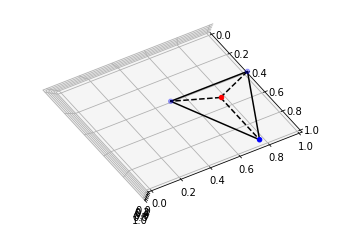

In [43]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos1[0][1:],pos1[1][1:],pos1[2][1:],color="blue")
ax.scatter(pos1[0][0],pos1[1][0],pos1[2][0],color="red")


for i in range(1,4):
    ax.plot3D([pos1[0][0],pos1[0][i]],[pos1[1][0],pos1[1][i]],[pos1[2][0],pos1[2][i]],c="k",ls="--")
ax.plot3D([pos[0][i] for i in [1,2,3,1]],[pos[1][i] for i in [1,2,3,1]],[pos[2][i] for i in [1,2,3,1]],c="k")

# ax.scatter(pos2[0][1:],pos2[1][1:],pos2[2][1:],color="blue")
# ax.scatter(pos2[0][0],pos2[1][0],pos2[2][0],color="red")
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_zlim(0,1)
ax.view_init(elev=90, azim=-30)
plt.show()

In [47]:
pos2.T

array([[0.456659, 0.25    , 0.386263],
       [0.345171, 0.007524, 0.199633],
       [0.345171, 0.492476, 0.199633],
       [0.858963, 0.25    , 0.395728]])

In [48]:
struc1.lattice.abc

(5.91437, 7.19642, 8.36143)